<h1> Student Success Prediction using Machine learning</h>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,learning_curve, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import auc,confusion_matrix, roc_curve, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV

### Read the dataset

In [ ]:
data = pd.read_csv("dataset.csv", sep=";")

In [ ]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data.shape

(4424, 35)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
data.describe(include="all")

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


### check if the dataset has null values

In [ ]:
data.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


### Count the number of every class in the output

<ipython-input-80-5df8f3be2699>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.Target, palette="bwr")


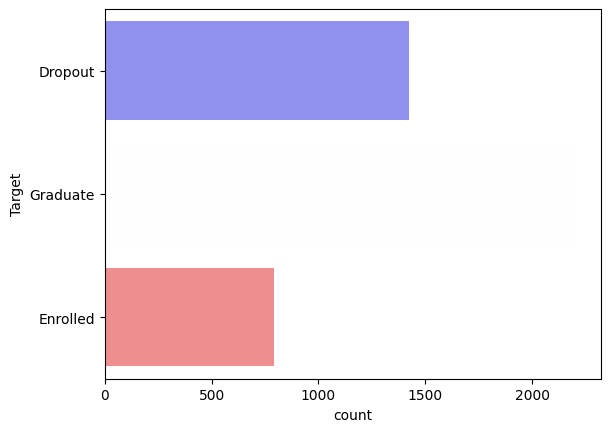

,proportion
Target,
Graduate,0.499322
Dropout,0.321203
Enrolled,0.179476


In [ ]:
sns.countplot(data.Target, palette="bwr")
plt.show()
data.Target.value_counts(normalize=True)

### Draw the correlation between the attributes

## Convert Dropout =0, Graduate=1, Enrolled=3

In [ ]:
data = pd.read_csv("dataset.csv", sep=";")
data["Target"]=data.Target.map(dict( Dropout =0, Graduate=1, Enrolled=2))

### select only Dropout and Graduate because the number of Enrolled students is very low

In [ ]:
data = data[data['Target'] != 2]

### Read the input and the output

In [ ]:
X = data.drop("Target",axis=1)
y = data["Target"]

In [ ]:
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [ ]:
X[:100]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1,1,1,2,1,1,1,3,14,3,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
123,1,1,1,14,1,1,1,23,28,10,...,0,0,5,5,5,14.200000,0,9.4,-0.8,-3.12
124,1,1,1,6,1,1,1,13,28,5,...,0,0,6,13,6,12.200000,0,15.5,2.8,-4.06
125,1,8,6,13,1,1,1,1,1,5,...,0,0,7,0,0,0.000000,0,13.9,-0.3,0.79


In [ ]:
y.head()

,Target
0,0
1,1
2,0
3,1
4,1


## Data scaling

In [ ]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit_transform(X)

In [ ]:
# Convert X to Dataframe with original columns names

import pandas as pd
X = pd.DataFrame(X, columns=data.drop("Target",axis=1).columns)


## Data splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

## Build models with RFS

## Logistic Regression Model

**Recursive feature elimination**

**Initial Training:** Train a model using all features and evaluate its performance using cross-validation.

**Feature Ranking:** Rank features based on their importance scores from the model.

**Feature Elimination:** Remove the least important feature(s).

**Re-Evaluation:** Re-train the model with the remaining features and evaluate using cross-validation.

**Repeat:** Repeat steps 2-4 until the optimal number of features is reached, yielding the best cross-validation score.

In [ ]:
LR=LogisticRegression(max_iter=1000)

rfe = RFECV(estimator=LR, step=20,cv=5)
rfe = rfe.fit(X_train, y_train)
y_pred=rfe.predict(X_test)

In [ ]:
# Need to know the best features choosen in the rfe

print('Optimal number of features: {}'.format(rfe.n_features_))
print('Selected features: {}'.format(list(X.columns[rfe.support_])))


Optimal number of features: 14
Selected features: ['Course', 'Nacionality', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']


### Metrics calculation

              precision    recall  f1-score   support

           0     0.9575    0.8286    0.8884       245
           1     0.9183    0.9813    0.9487       481

    accuracy                         0.9298       726
   macro avg     0.9379    0.9049    0.9186       726
weighted avg     0.9315    0.9298    0.9284       726



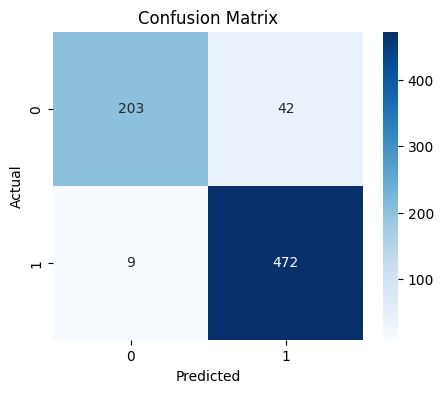

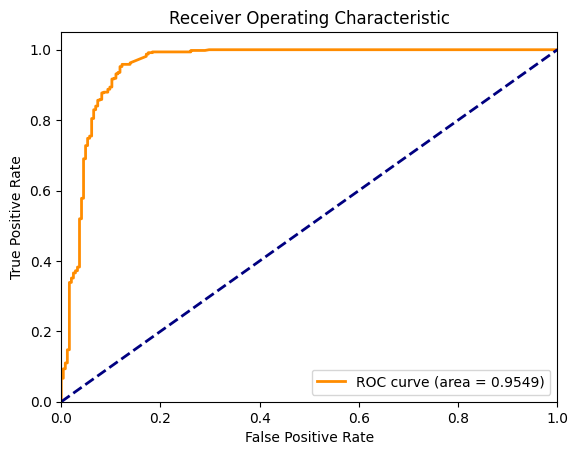

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = rfe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Random Forest implementation

In [ ]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
rf_3 = RandomForestClassifier()
rfe = RFECV(estimator=rf_3, step=20,cv=5)
rfe = rfe.fit(X_train, y_train)
y_pred=rfe.predict(X_test)

print('Optimal number of features: {}'.format(rfe.n_features_))
print('Selected features: {}'.format(list(X.columns[rfe.support_])))

Optimal number of features: 34
Selected features: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


              precision    recall  f1-score   support

           0     0.9455    0.8490    0.8946       245
           1     0.9269    0.9751    0.9504       481

    accuracy                         0.9325       726
   macro avg     0.9362    0.9120    0.9225       726
weighted avg     0.9331    0.9325    0.9315       726



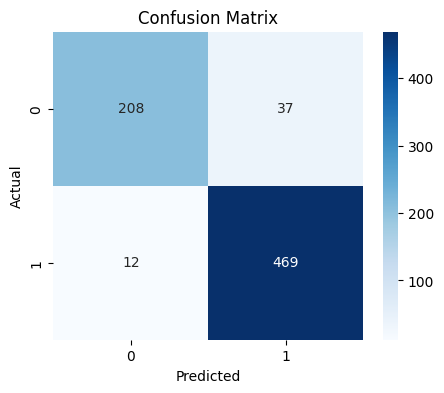

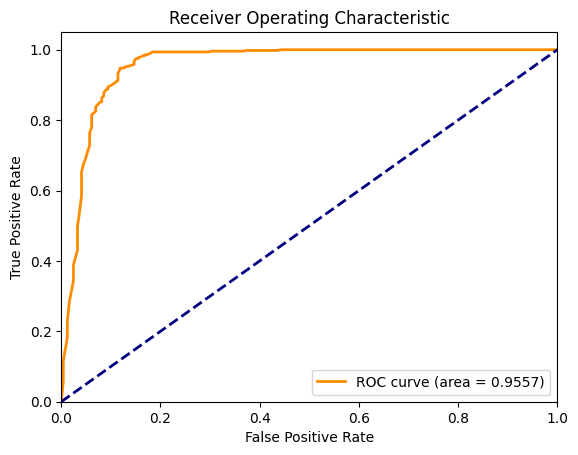

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = rfe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## XGBoost Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier


xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

rfe = RFECV(estimator=xgb, step=20,cv=5)
rfe = rfe.fit(X_train, y_train)
y_pred=rfe.predict(X_test)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:55:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:55:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:55:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:55:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:55:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarn

In [ ]:
print('Optimal number of features: {}'.format(rfe.n_features_))
print('Selected features: {}'.format(list(X.columns[rfe.support_])))

Optimal number of features: 34
Selected features: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


              precision    recall  f1-score   support

           0     0.9241    0.8449    0.8827       245
           1     0.9243    0.9647    0.9440       481

    accuracy                         0.9242       726
   macro avg     0.9242    0.9048    0.9134       726
weighted avg     0.9242    0.9242    0.9234       726



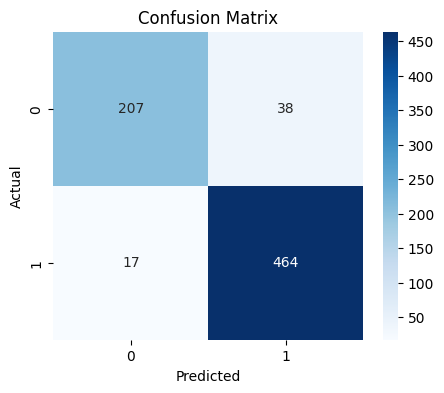

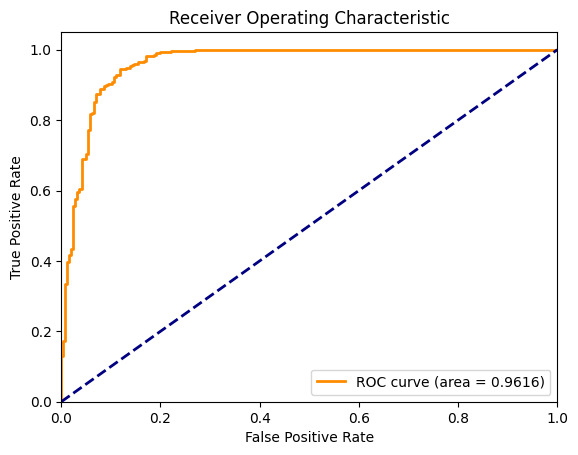

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = rfe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
GBC=GradientBoostingClassifier()

rfe = RFECV(estimator=GBC, step=1,cv=5)
rfe = rfe.fit(X_train, y_train)
y_pred=rfe.predict(X_test)

print('Optimal number of features: {}'.format(rfe.n_features_))
print('Selected features: {}'.format(list(X.columns[rfe.support_])))

              precision    recall  f1-score   support

           0     0.9541    0.8490    0.8985       245
           1     0.9272    0.9792    0.9525       481

    accuracy                         0.9353       726
   macro avg     0.9406    0.9141    0.9255       726
weighted avg     0.9363    0.9353    0.9343       726



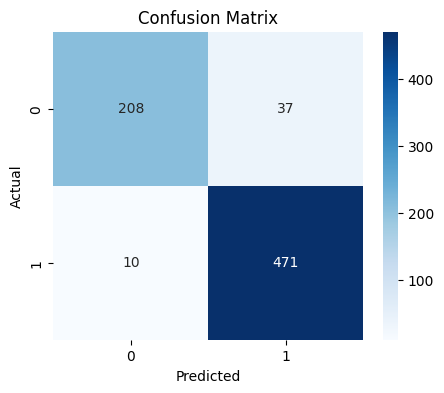

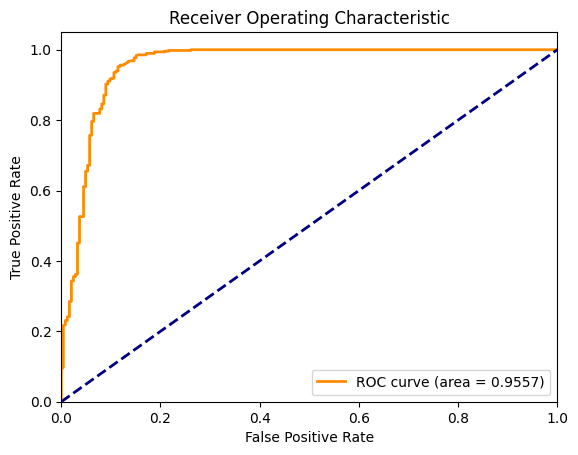

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = rfe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## SVC

In [ ]:
from sklearn.svm import SVC
svm_4 = SVC(kernel='linear', probability=True)
svmcv = RFECV(estimator=svm_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
svmcv = svmcv.fit(X_train,y_train)
y_pred=svmcv.predict(X_test)

print('Optimal number of features: {}'.format(svmcv.n_features_))
print('Selected features: {}'.format(list(X.columns[svmcv.support_])))


              precision    recall  f1-score   support

           0     0.9537    0.8408    0.8937       245
           1     0.9235    0.9792    0.9506       481

    accuracy                         0.9325       726
   macro avg     0.9386    0.9100    0.9221       726
weighted avg     0.9337    0.9325    0.9314       726



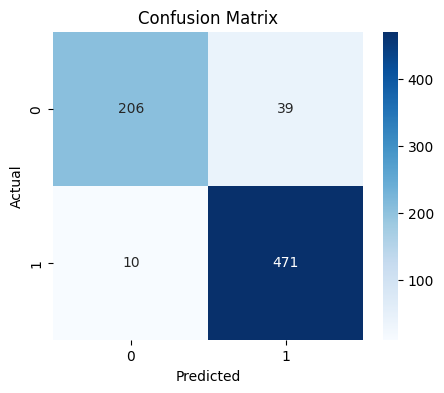

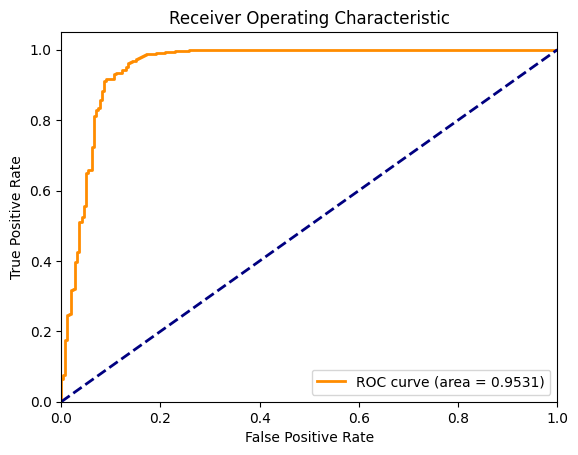

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Transform X_test to have the same number of features as the trained model
X_test_transformed = svmcv.transform(X_test)

y_pred_proba = svmcv.estimator_.predict_proba(X_test_transformed)[:, 1] # Access the underlying estimator and predict on transformed data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# define the base models
level0 = list()
level0.append(('LR', LogisticRegression()))
level0.append(('KNN', KNeighborsClassifier()))
level0.append(('DT', DecisionTreeClassifier()))
level0.append(('SVM', SVC()))
level0.append(('MLP', MLPClassifier(max_iter=1000)))
level0.append(('SGD',SGDClassifier()))
level0.append(('XGB',XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)))
level0.append(('Adaboost',AdaBoostClassifier(base_estimator=DecisionTreeClassifier())))

# define meta learner model
level1= LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:19:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:20:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:20:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:20:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/l

              precision    recall  f1-score   support

           0     0.9295    0.8612    0.8941       245
           1     0.9319    0.9667    0.9490       481

    accuracy                         0.9311       726
   macro avg     0.9307    0.9140    0.9215       726
weighted avg     0.9311    0.9311    0.9304       726



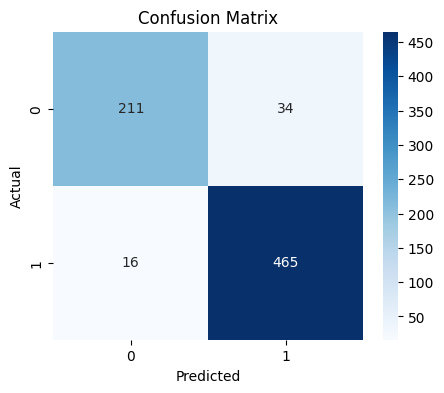

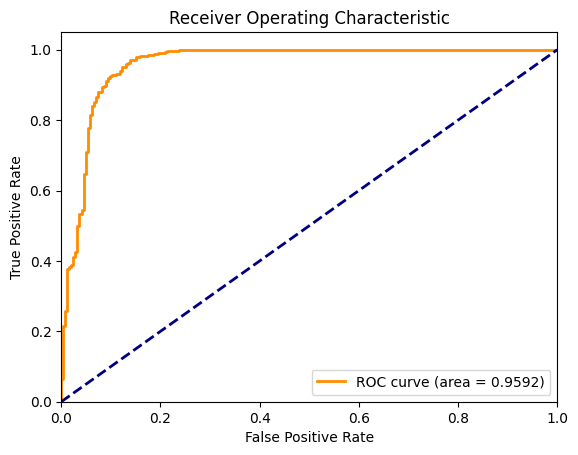

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
